## Bike Index Seattle

### Descriptive stats of variables

In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd
from shapely import wkt
import folium
import contextily as cx

import requests

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Load data

crashes = pd.read_csv('data/crash_streets_vol.csv', parse_dates=['DATETIME'])

keep_cols = ['REPORT NUMBER',
            'DATETIME',
            'SPEEDLIMIT',
            'SURFACEWIDTH',
            'AWDT_ROUNDED',
            'one_way',
            'is_steep',
            'is_paved',
            'is_hwy',
            'is_bus',
            'is_truck',
            'is_light',
            'is_clear',
            'is_hit_run',
            'is_workzone',
            'is_child',
            'impaired',
            'speeding',
            'driver_16_25',
            'driver_65_plus',
            'severity',
            'geometry']

In [3]:
gdf = gpd.GeoDataFrame(crashes[keep_cols])

gdf['geometry'] = gdf['geometry'].apply(wkt.loads)

gdf = gpd.GeoDataFrame(gdf, geometry='geometry', crs=4326)

#### Total cases

In [4]:
gdf_map = gdf.to_crs(epsg=3857)

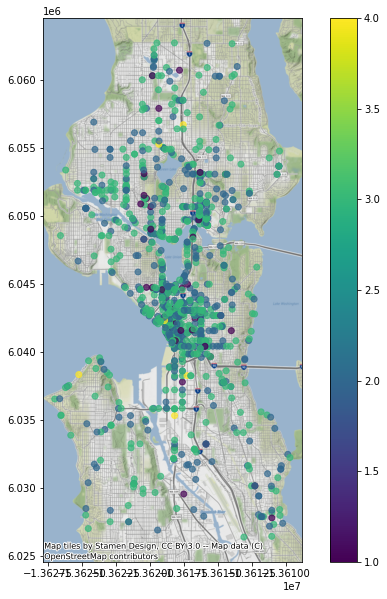

In [5]:
ax = gdf_map.plot('severity', figsize=(10, 10), alpha=0.7, legend=True)
cx.add_basemap(ax)

In [6]:
gdf['REPORT NUMBER'].groupby(gdf.severity).count()

severity
1     55
2    470
3    638
4      6
Name: REPORT NUMBER, dtype: int64

<AxesSubplot:xlabel='severity'>

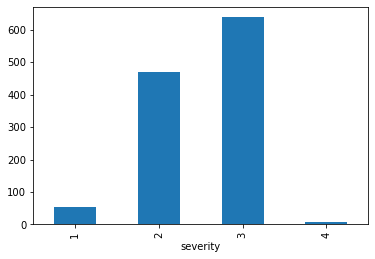

In [7]:
gdf['REPORT NUMBER'].groupby(gdf.severity).count().plot(kind='bar')

In [8]:
feats = gdf.iloc[:,2:-2]
severity = gdf['severity']

In [9]:
to_csv = gdf.iloc[:,2:-1]

In [10]:
to_csv.to_csv('data/crashes.csv', index=False)

In [11]:
def plot_cat(col_name):
    
    fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5))
    
    subdf = gdf[[col_name, 'severity']]
    cat_names = list(np.unique(subdf[col_name]))
    sevs = np.arange(1,5)
    
    axes[0].hist(subdf[col_name])
    axes[0].set_title('All')
    
    for i, sev in enumerate(sevs):
        
        res = subdf.loc[subdf['severity'] == sev][col_name]
        axes[i+1].hist(res)
        axes[i+1].set_title('Severity: '+str(sev))
    
    fig.suptitle(col_name)
    plt.show()

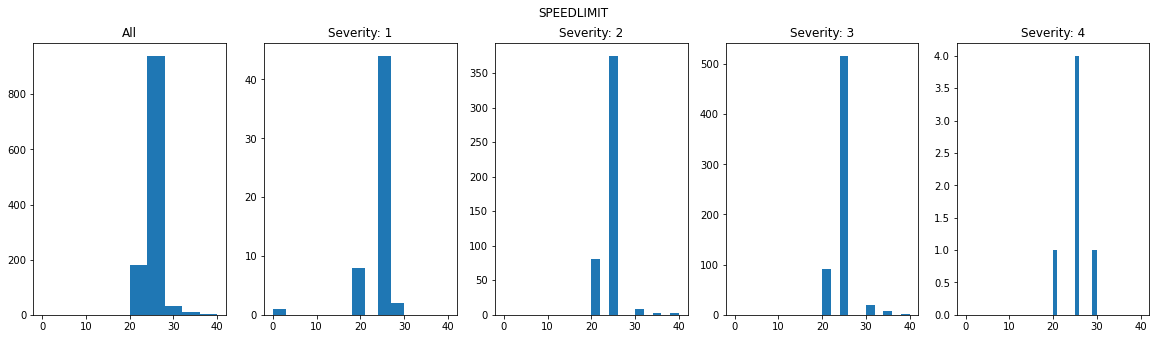

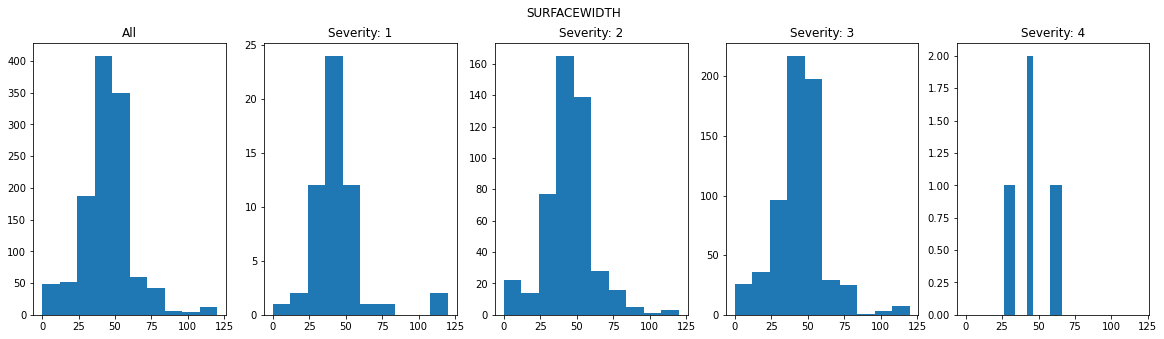

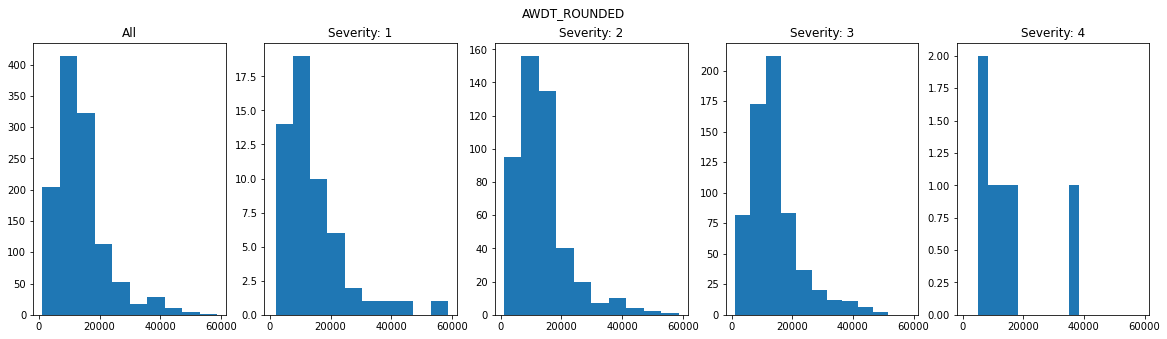

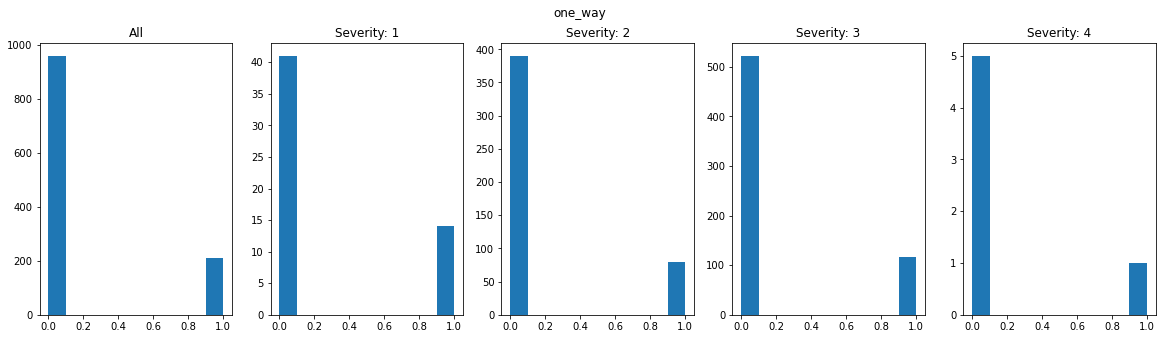

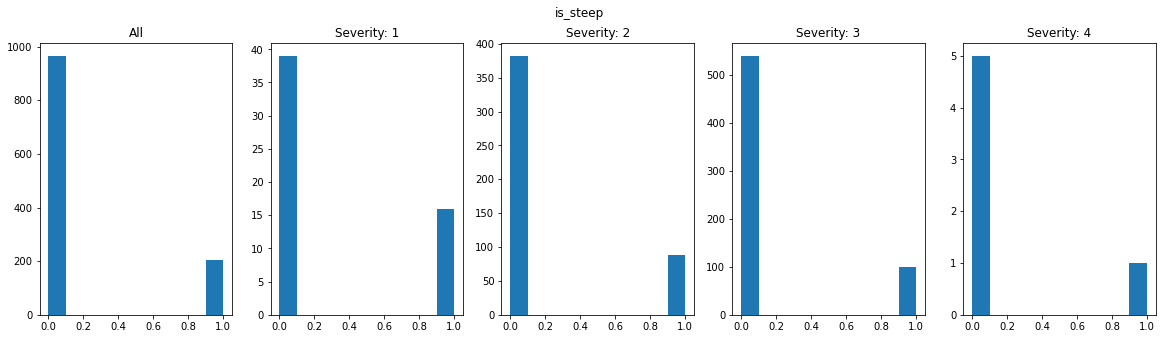

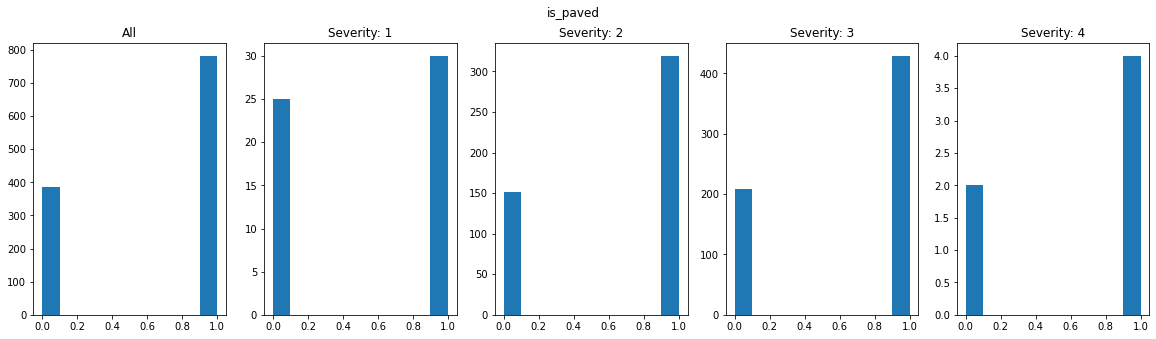

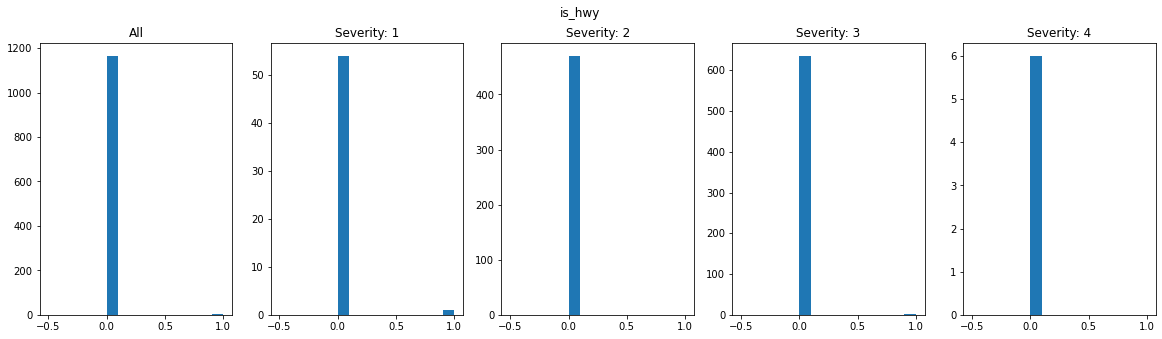

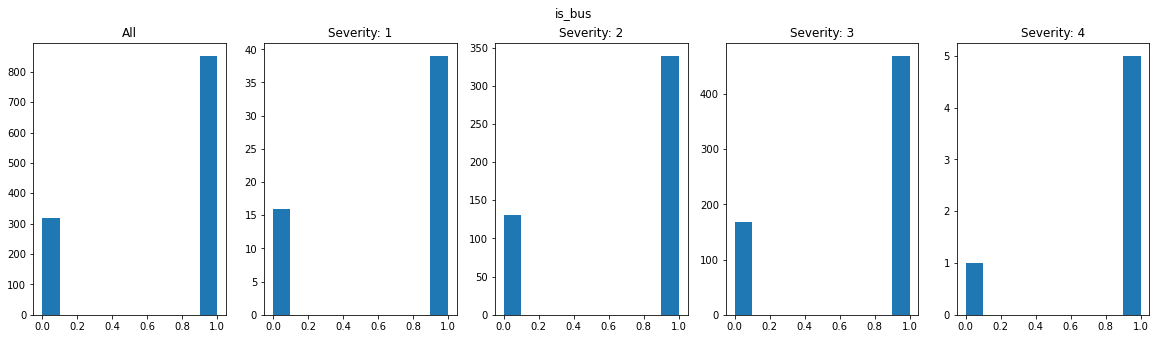

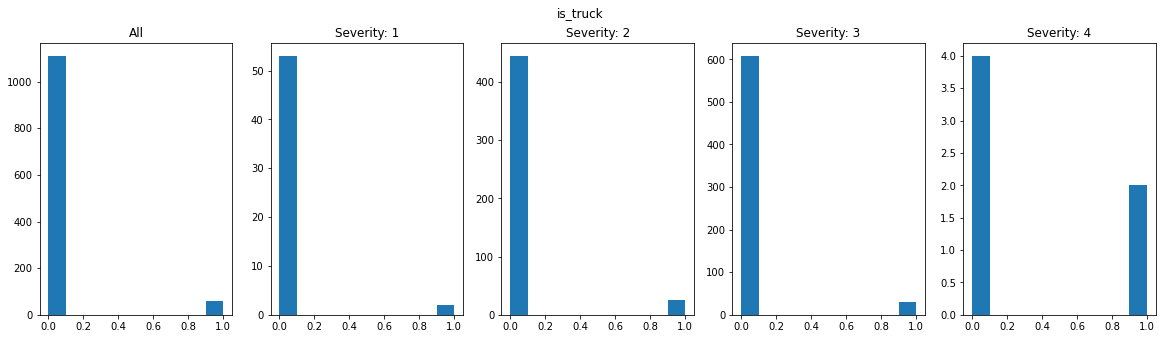

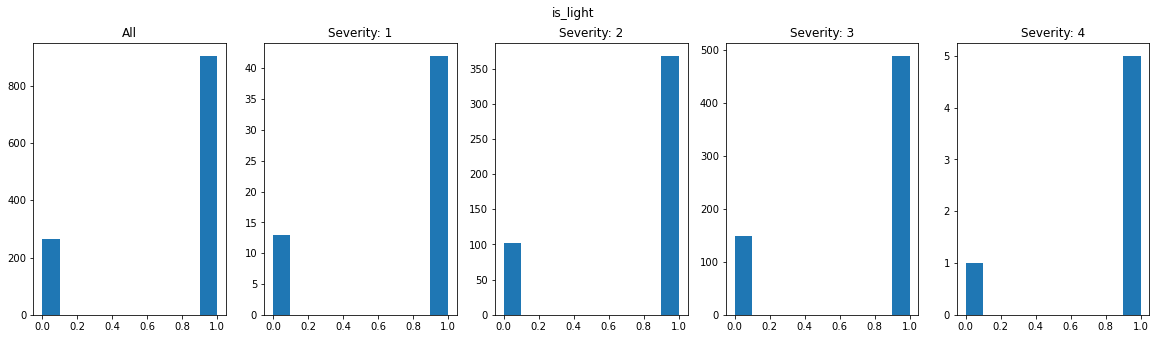

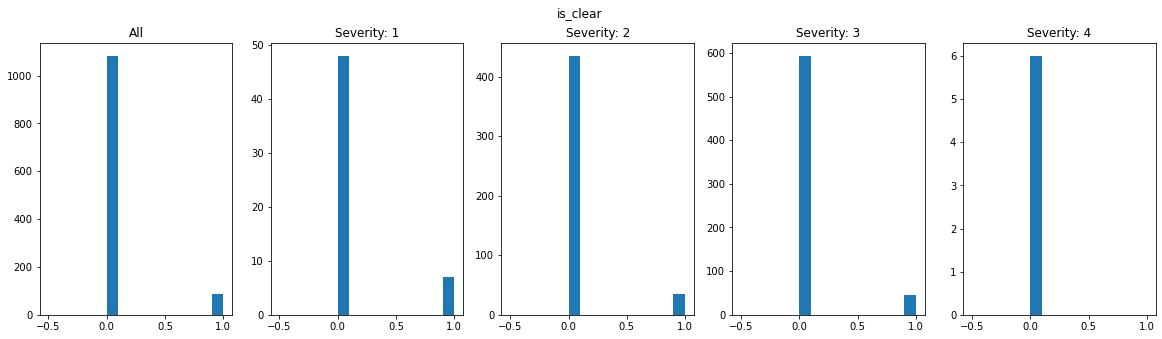

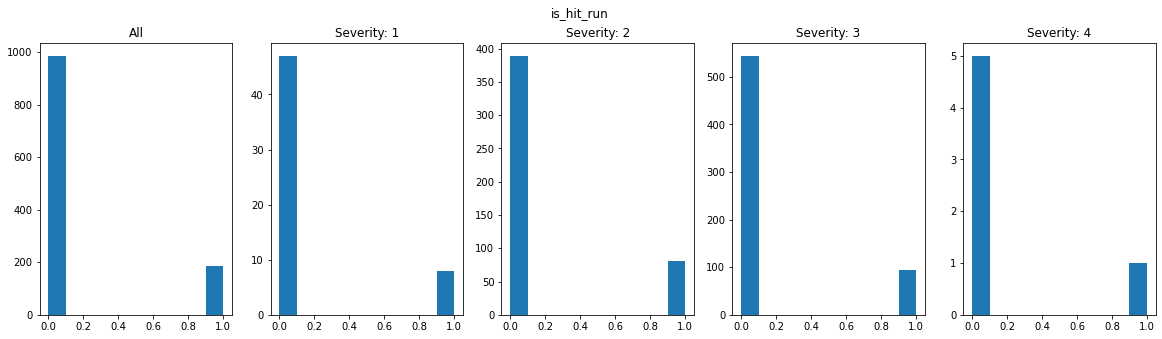

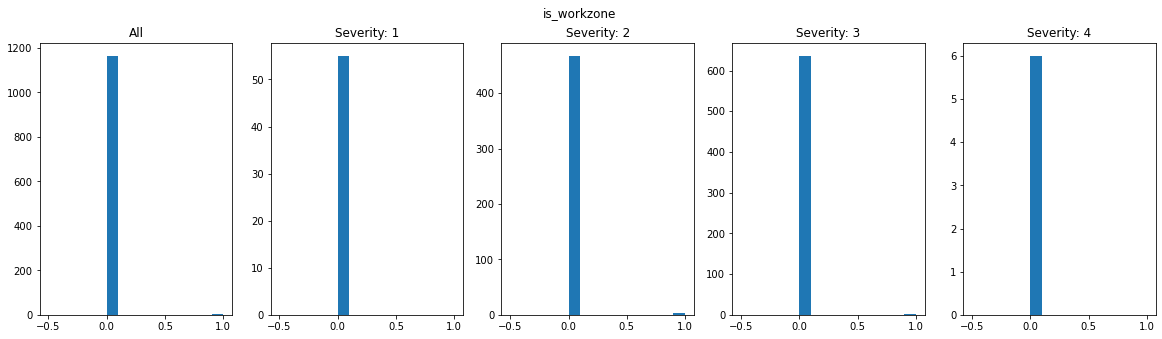

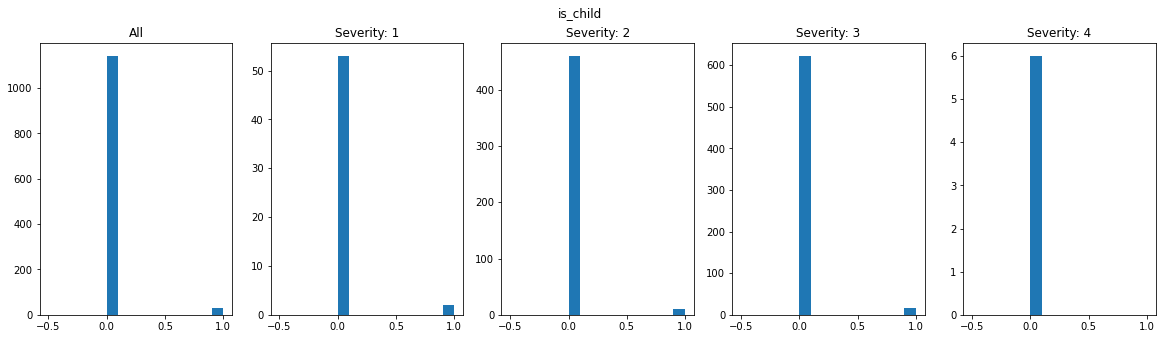

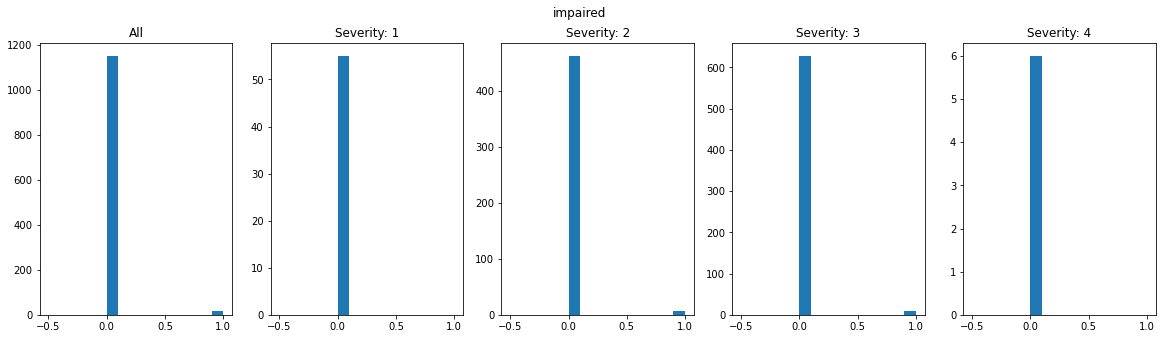

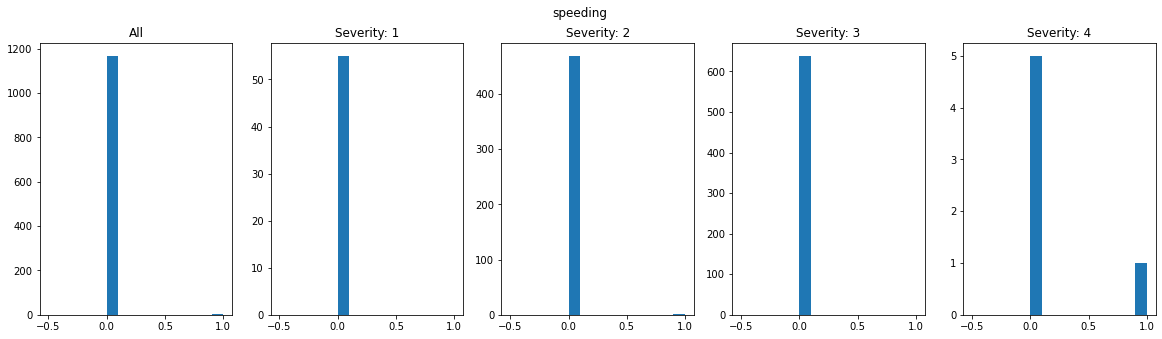

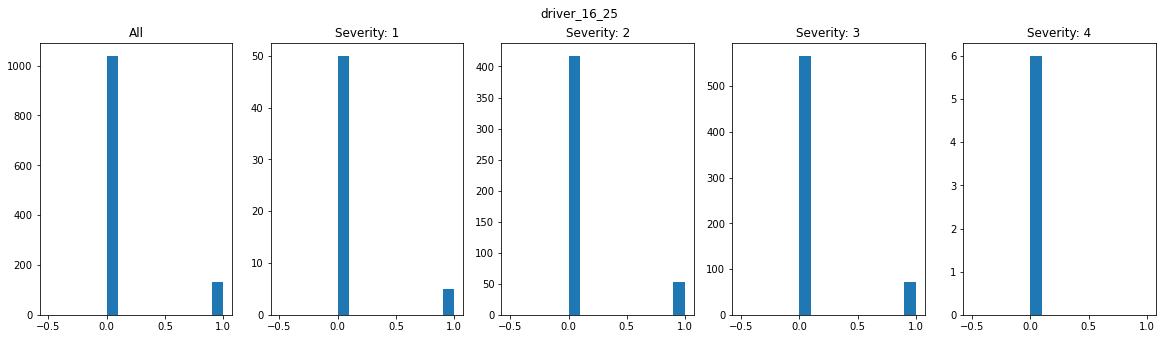

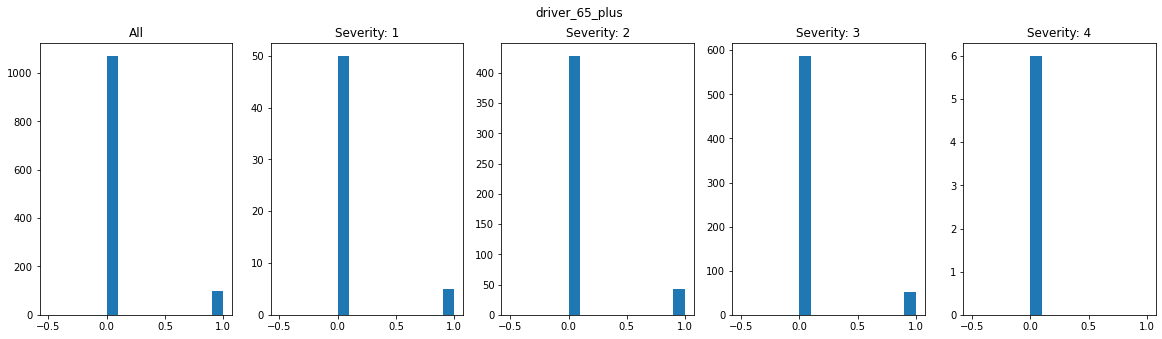

In [12]:
for col in feats.columns:
    
    plot_cat(col)

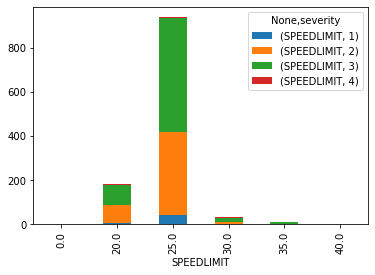

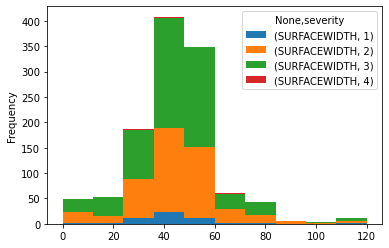

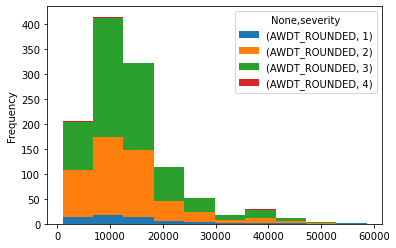

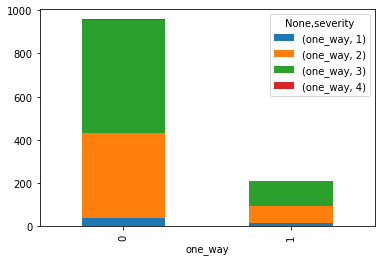

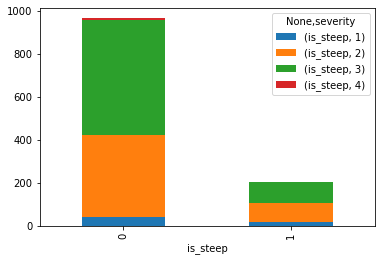

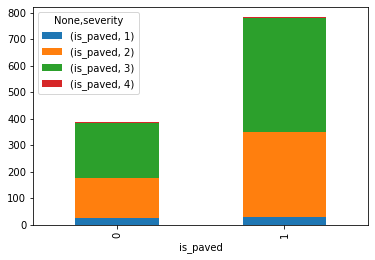

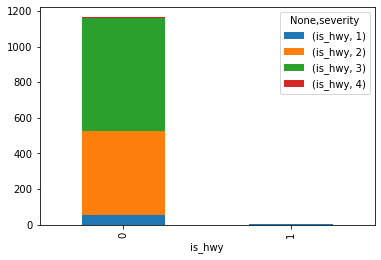

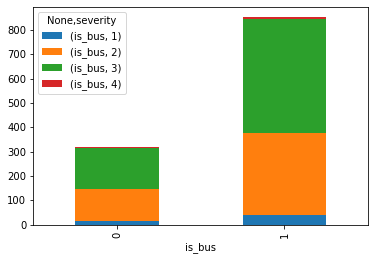

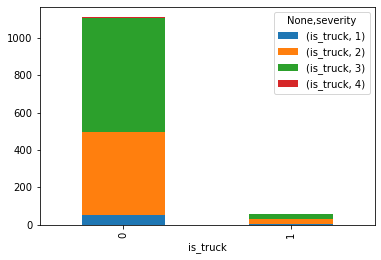

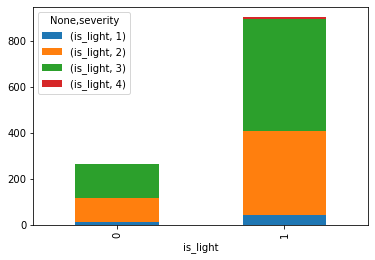

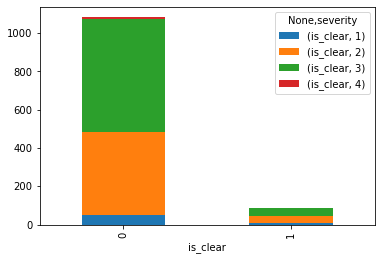

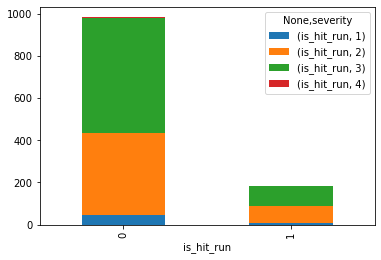

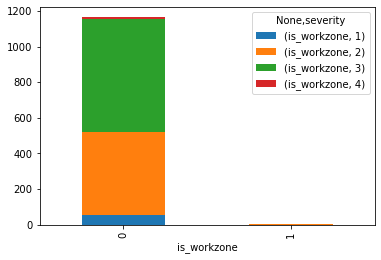

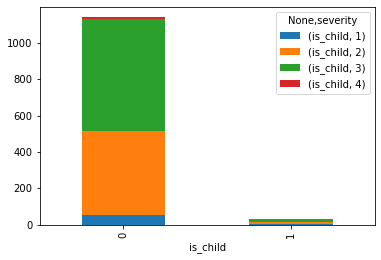

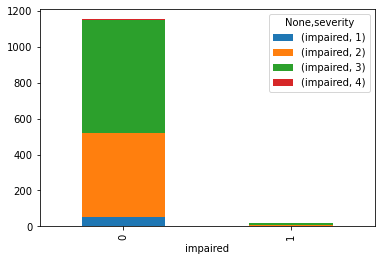

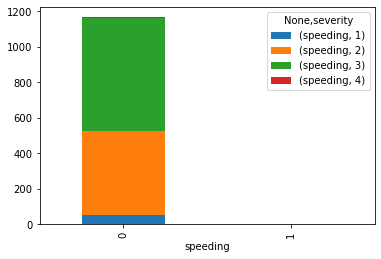

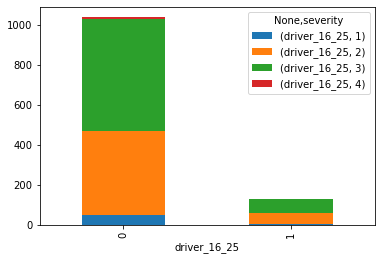

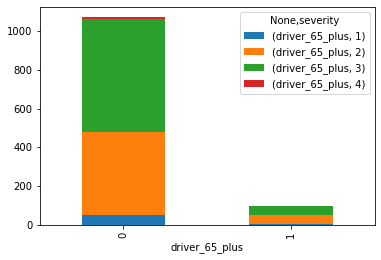

In [13]:
cont_cols = ['SURFACEWIDTH','AWDT_ROUNDED']

for col in feats.columns:
    subdf = gdf[[col, 'severity']]
    piv = subdf.pivot(columns='severity')
    if col in cont_cols:
        piv.plot(kind='hist', stacked=True)
    else:
        piv.groupby(subdf[col]).count().plot(kind='bar', stacked=True)